This notebook shows the if we rescale our features such that all the features are centered around the mean and have same variance, the Gradient Dissent algortihm converges faster.

For this we synthesize training data for the function $f(x_1,x_2) = w_0 + w_1 x_1 + w_2 x_2 + n$, where n is random uniform noise in [0,1], $w_0 = 50$, $w_1 = 0.5$ and $w_2 = 0.5$.   

We import numpy and matplotlib.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

We will create $100$ point for $x_1$ in the range of $[100, 500]$, and $100$ interger points for $x_2$ in the range of $[2,6]$. Then we will use the function $f(x_1,x_2) = w_0 + w_1 x_1 + w_2 x_2 + n$ to computer $Y$.

In [4]:
# creating data for: y = a0 + a1 x1 + a2 x2

m = 100 # number of data points
w0, w1, w2 = 50, 0.5, 0.5

x1 = np.linspace(100, 500, m)
x2 = np.random.randint(2, 6, m)
X = np.zeros([m,2])
X[:,0] = x1
X[:,1] = x2

Y = w0 + w1*x1 + w2*x2
Y = Y + np.random.rand(m)
Y = Y.reshape([m,1])


We add another feature of value $1$ for all data point to take care for $w_0$.

In [5]:
X = np.hstack((np.ones([m,1]), X))

Now, we write following functions:

1) initialize: We start with a value of $W$ being all zero.

2) forward: computes the cost for given $X$, $Y$ and $W$. 

3) backward: computes the gradient for a given $X$, $Y$ and $W$.

4) update: use backward function to compute gradient and update the parameters $W$.

In [6]:
# linear regression model

def initialize():
    W = np.zeros([3,1])
    return W
    
def forward(W,X,Y):
    m = X.shape[0]
    return ((np.linalg.norm(np.dot(X, W) - Y))**2)/(2*m)

def backward(W,X,Y):
    m = X.shape[0]
    dW = (1/m)*(np.dot(np.dot(X.T,X),W) - np.dot(X.T, Y))
    return dW

def update(W,X,Y, alpha):
    W = W - alpha*backward(W,X,Y) 
    return W



Now we start the training process. We tune different values of $\alpha$ so that we do not overshoot as well as do not go too slow. And then run over iterations untill the costs saturate. To visualize it better we use $log(cost)$. We can check that our optimum choice of $W$ is closer to the choice of $W$ we desgined the function with.


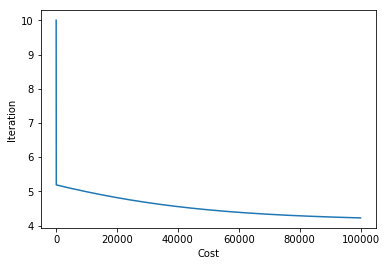

final cost:  4.22213197025
[[ 2.7889687 ]
 [ 0.57165995]
 [ 6.83127772]]


In [7]:
alpha = 0.000006
iters = 100000

costs = []

W = initialize()
for i in range(iters):
    costs.append(np.log(forward(W,X,Y)))
    W = update(W,X,Y,alpha)

plt.plot(costs)
plt.xlabel('Cost')
plt.ylabel('Iteration')
plt.show()
print("final cost: ",  costs[-1])
print(W)

# Cost can go upto 

Now, we do the same process but with feature scaling. We subtract the mean and divide by the standard deviation of second and third feature as the first feature is constant. 

In [8]:
# With feature scaling
X_new = X[:]
X_new[:,1:3] = X[:,1:3] - np.mean(X[:,1:3], axis = 0, keepdims = True)
X_new[:,1:3] = X[:,1:3]/np.std(X[:,1:3], axis= 0, keepdims = True)

Again, we pick a value of $\alpha_2$ such that it neither overshoot nor goes too slow. We see that it converges in just $5$ iterations.


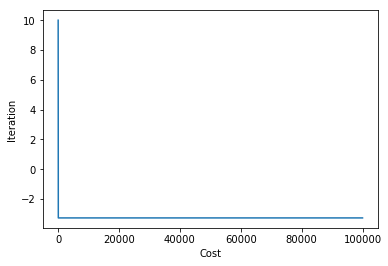

final cost:  -3.27297829771
[[ 202.31654627]
 [  58.3148318 ]
 [   0.47222629]]


In [9]:
alpha_2 = 0.5
iters_2 = 100000

costs_new = []

W = initialize()
for i in range(iters_2):
    costs_new.append(np.log(forward(W,X_new,Y)))
    W = update(W,X_new,Y,alpha_2)
    
plt.plot(costs_new)
plt.xlabel('Cost')
plt.ylabel('Iteration')
plt.show()
print("final cost: ",  costs_new[-1])
print(W)

Now, we plot costs vs iterations for both the schemes that is without feature scaling as well as with feature scaling. One can easily see that without scaling the features the cost keeps on decreasing even after $10000$ iterations while with feature scaling it converges in just $5$ iterations.

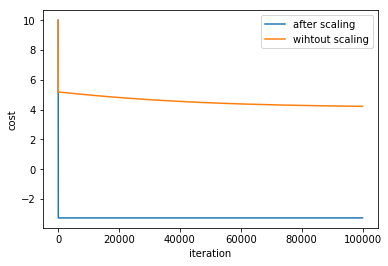

In [10]:
plt.plot(costs_new, label = 'after scaling')
plt.plot(costs, label = 'wihtout scaling')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()
